#  Minor Project  
## Python, Statistics and Data Preparation Walkthrough using Iris Dataset

This notebook demonstrates foundational skills in Python programming, 
statistical analysis, and data preparation techniques using the Iris dataset.

The project covers:

- Python Data Structures
- Object-Oriented Programming (OOPS)
- Decision Making
- Descriptive Statistics
- Data Visualization
- Inferential Statistics (T-Test & Chi-Square)

The objective is to build a strong base for Data Science and Machine Learning workflows.


## Problem Statement

The goal of this project is to analyze a real-world dataset using Python 
and apply statistical techniques to extract meaningful insights.

Using the Iris dataset, we perform:

- Data loading and preprocessing
- Statistical summary analysis
- Feature distribution visualization
- Hypothesis testing preparation

This helps in understanding how raw data is transformed into 
actionable information in Data Science projects.


## 1. Import Libraries

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats

## 2. Load Dataset

The Iris dataset is a famous dataset in Data Science containing 
measurements of iris flowers.

Features include:

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width
- Species


In [3]:
# Load dataset from sklearn

iris = load_iris()

# Convert into Pandas DataFrame
df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)

# Add species column
df['species'] = iris.target

# Map numeric labels to names
df['species'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

# Display first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Object-Oriented Programming Implementation

A simple class `DataAnalyzer` is created to:

- Load the dataset
- Generate descriptive statistics

In [5]:
class DataAnalyzer:
    
    # Method to load data
    def load_data(self, dataframe):
        self.data = dataframe
        print("Data Loaded Successfully!\n")
        return self.data.head()
    
    # Method to generate descriptive statistics
    def get_descriptive_stats(self):
        print("Descriptive Statistics:\n")
        return self.data.describe()

In [6]:
# Create object
analyzer = DataAnalyzer()

# Load data
analyzer.load_data(df)

# Get statistics
analyzer.get_descriptive_stats()

Data Loaded Successfully!

Descriptive Statistics:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Decision Making using if-elif-else

Petal length is categorized into:

- Small
- Medium
- Large


In [7]:
def categorize_petal_length(length):
    
    if length < 2:
        return "Small"
    
    elif 2 <= length < 5:
        return "Medium"
    
    else:
        return "Large"

# Apply categorization
df['petal_length_category'] = df['petal length (cm)'].apply(
    categorize_petal_length
)

df[['petal length (cm)', 'petal_length_category']].head()

,petal length (cm),petal_length_category
0,1.4,Small
1,1.4,Small
2,1.3,Small
3,1.5,Small
4,1.4,Small


## 5. Descriptive Statistical Analysis

Descriptive statistics summarize the dataset using:

- Mean
- Median
- Standard Deviation
- Min & Max values


In [8]:
# Statistical summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Manual Calculation of Mean and Median

In [9]:
# Manual Mean
mean_manual = sum(df['sepal length (cm)']) / len(df)

# Manual Median
median_manual = np.median(df['sepal length (cm)'])

print("Manual Mean:", mean_manual)
print("Manual Median:", median_manual)

# Verification
print("\nPandas Mean:", df['sepal length (cm)'].mean())
print("Pandas Median:", df['sepal length (cm)'].median())

Manual Mean: 5.843333333333335
Manual Median: 5.8

Pandas Mean: 5.843333333333334
Pandas Median: 5.8


## 6. Data Visualization — Histogram

Histogram shows distribution of Petal Width.


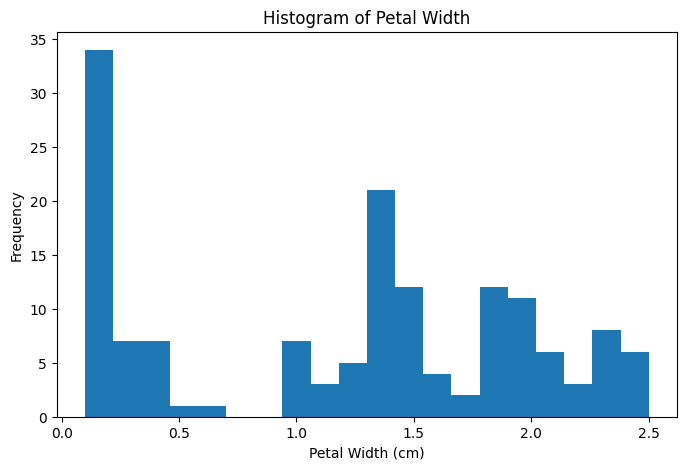

In [10]:
plt.figure(figsize=(8,5))

plt.hist(df['petal width (cm)'], bins=20)

plt.title("Histogram of Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")

plt.show()

## 7. Inferential Statistics — T-Test

We compare Sepal Length between:

- Setosa
- Versicolor

### Hypothesis

**Null Hypothesis (H₀):**  
No significant difference in means.

**Alternative Hypothesis (H₁):**  
Significant difference exists.

In [11]:
setosa = df[df['species'] == 'setosa']['sepal length (cm)']
versicolor = df[df['species'] == 'versicolor']['sepal length (cm)']

# Means
print("Setosa Mean:", setosa.mean())
print("Versicolor Mean:", versicolor.mean())

# T-Test
t_stat, p_value = stats.ttest_ind(setosa, versicolor)

print("\nT-Statistic:", t_stat)
print("P-Value:", p_value)

Setosa Mean: 5.006
Versicolor Mean: 5.936

T-Statistic: -10.52098626754911
P-Value: 8.985235037487079e-18


## 8. Chi-Square Test Preparation

Sepal length is converted into categories:

- Short
- Tall

Then cross-tabulation is created with species.

In [12]:
df['sepal_length_category'] = pd.cut(
    df['sepal length (cm)'],
    bins=[0, 5.5, 10],
    labels=['Short', 'Tall']
)

df[['sepal length (cm)', 'sepal_length_category']].head()

,sepal length (cm),sepal_length_category
0,5.1,Short
1,4.9,Short
2,4.7,Short
3,4.6,Short
4,5.0,Short


In [13]:
# Create contingency table
contingency_table = pd.crosstab(
    df['sepal_length_category'],
    df['species']
)

contingency_table

species,setosa,versicolor,virginica
sepal_length_category,,,
Short,47,11,1
Tall,3,39,49


In [14]:
# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)

Chi-Square Value: 98.11883032222016
P-Value: 4.940452295286229e-22
Degrees of Freedom: 2


##  Conclusion

This project demonstrated foundational data analysis skills using Python.

Key outcomes:

- Implemented OOPS concepts for data handling
- Performed descriptive statistical analysis
- Visualized feature distributions
- Applied decision-making logic
- Prepared data for inferential tests
- Conducted T-Test and Chi-Square analysis

The workflow reflects real-world data preprocessing and 
analysis steps required before Machine Learning modeling.
